In [1]:
import os
os.chdir('../../../..')
import matplotlib.pyplot as plt
from Simulation.libraries.Environment import *
from ExperimentTools.pc_and_maze_creation.tools.path_planning.MazePaths import *
import numpy as np
from matplotlib.collections import LineCollection
import pickle

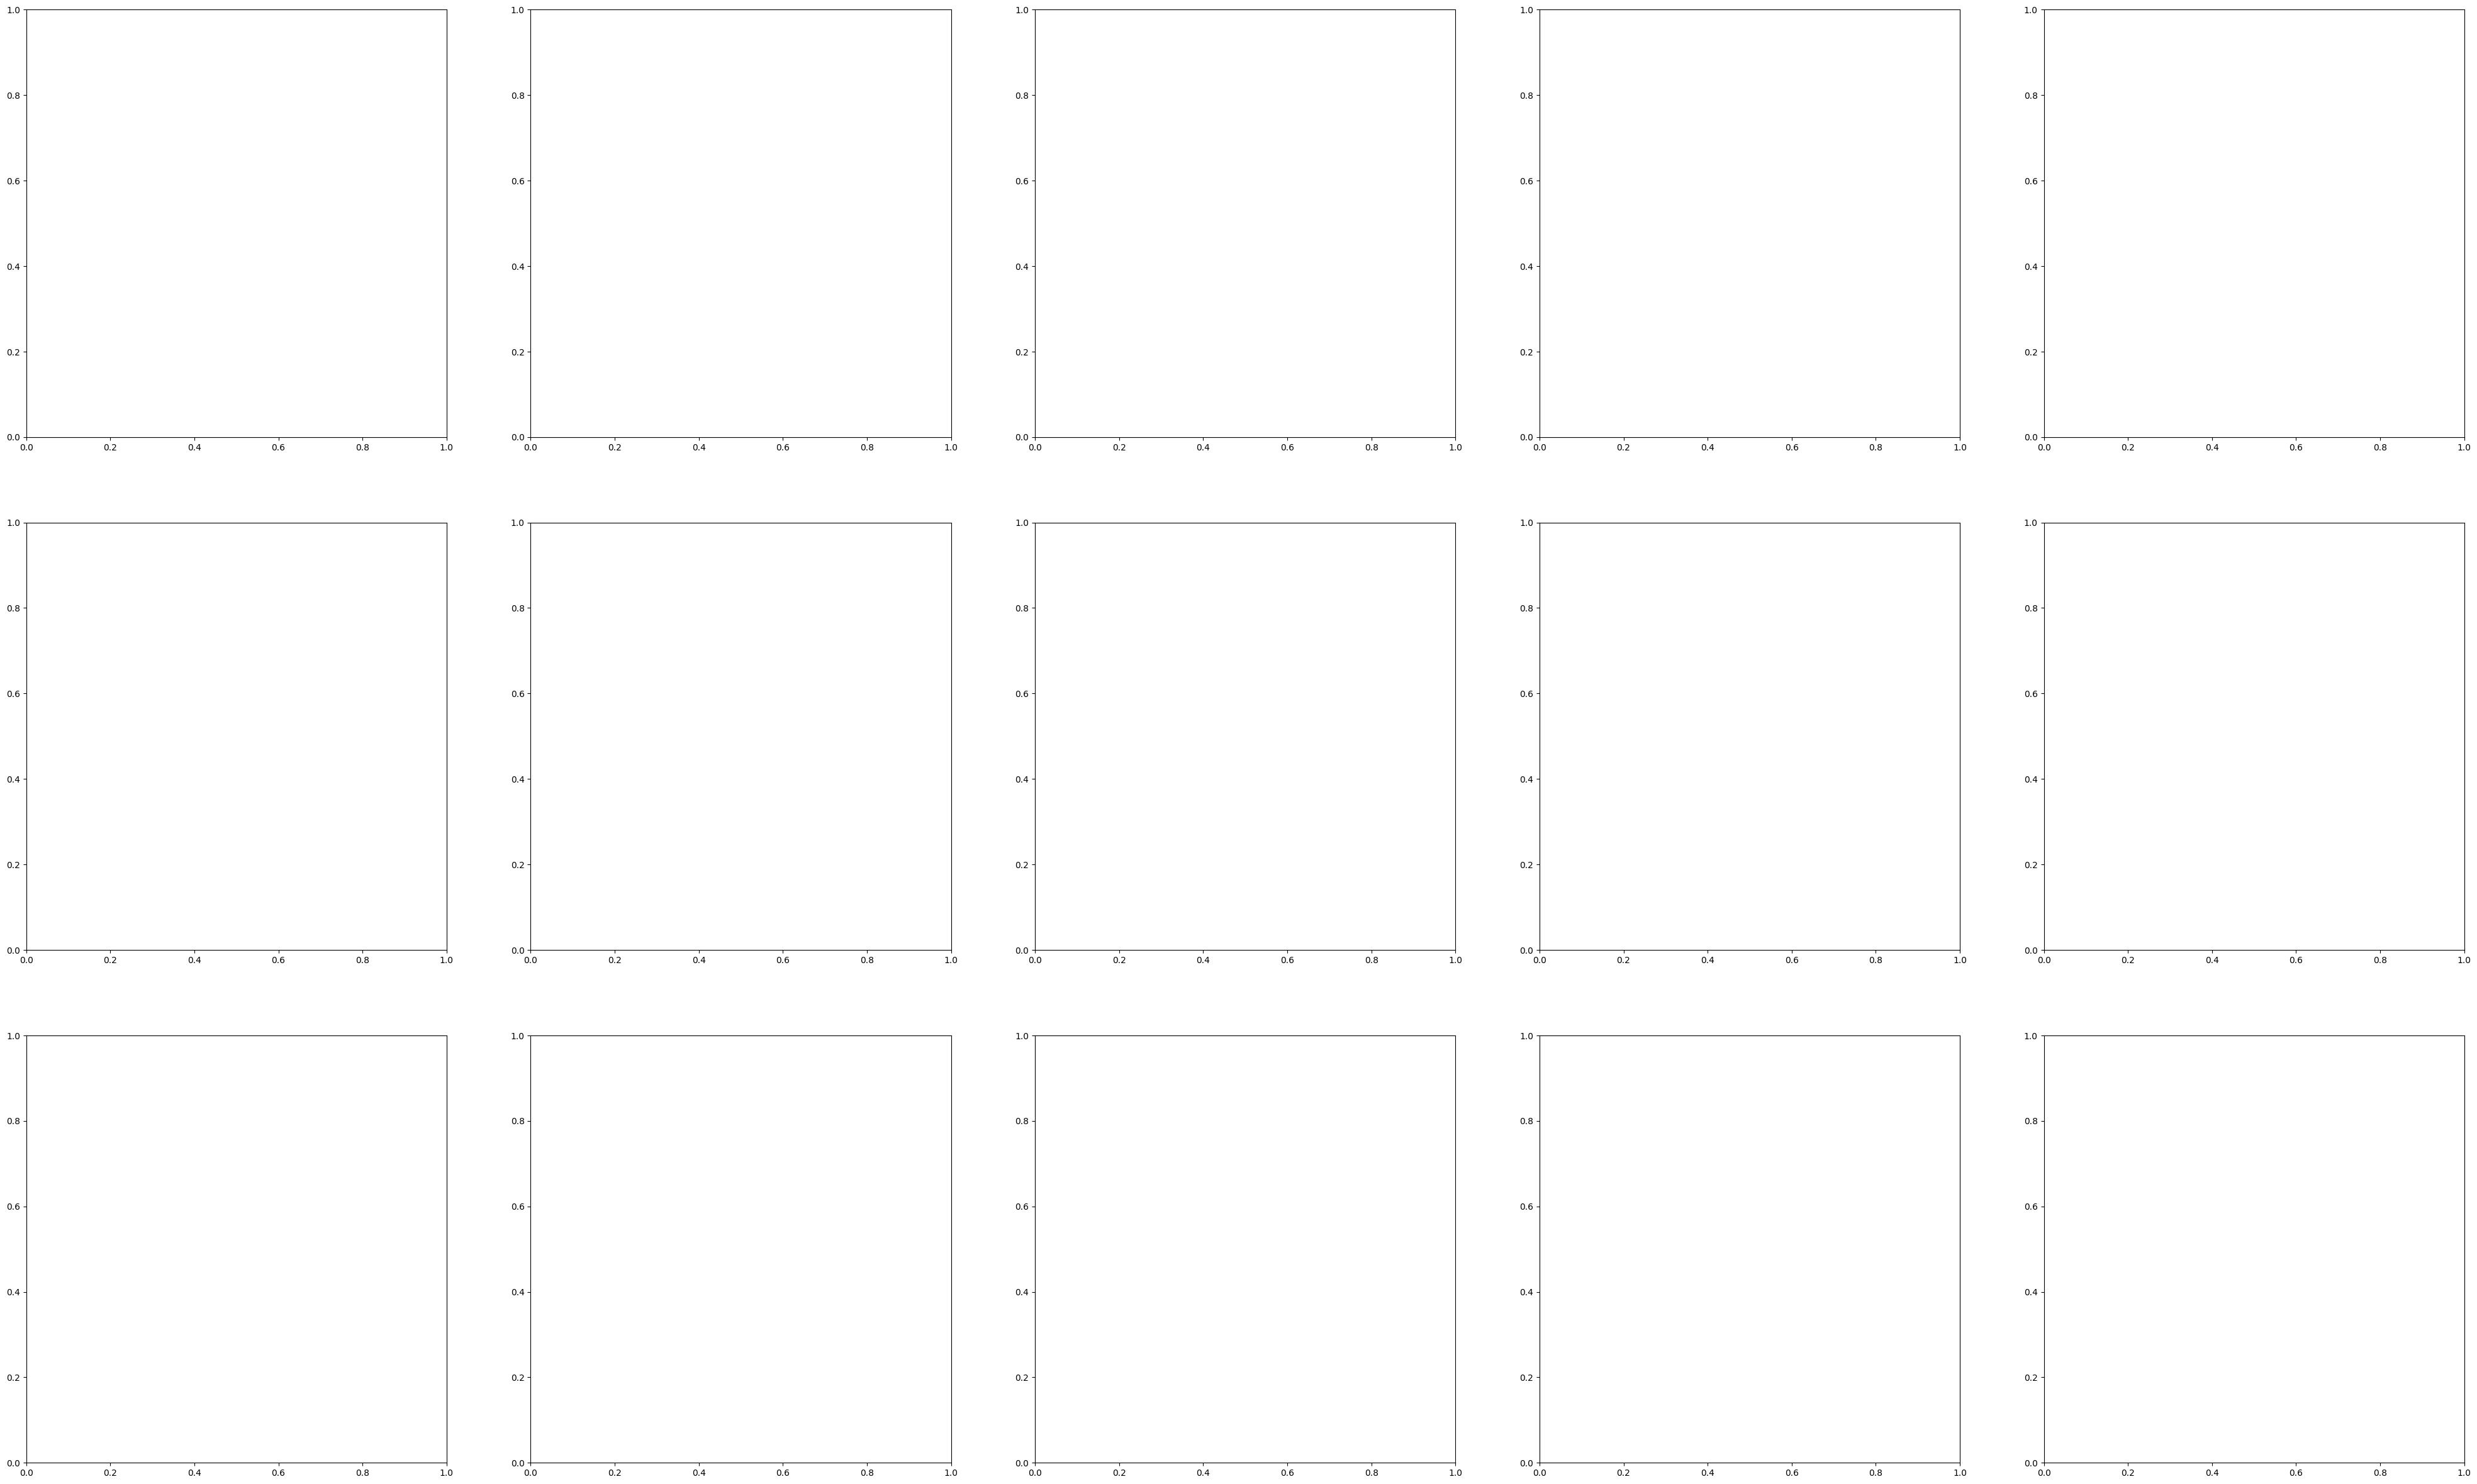

In [17]:
maze_dir = 'Simulation/worlds/mazes/Experiment1/'
pc_dir  = 'Simulation/GeneratedPCNetworks/'
mazes = ['WM00','WM10','WM20']
save_dir = 'Simulation/GeneratedPCNetworks/PlaceCellFigures/'
threshold_indexes = [0,1,2]
sample_indexes = [0,1,2,3,4]
final_fig, final_ax = plt.subplots(nrows = 3,
                        ncols = 5,
                        figsize= (50, 30)
                       )
for maze_name in mazes:
    final_fig, final_ax = plt.subplots(nrows = 3,
                        ncols = 5,
                        figsize= (50, 30),
                        sharey=True
                       )
    for threshold in threshold_indexes:
        
        for sample in sample_indexes:
            maze = Maze(maze_dir+maze_name+'.xml')
            maze.close_maze_figure()
            final_ax[threshold,sample].set_title(f'PC Threshold: {1*10**(threshold-2)} Run: {sample}',fontsize=16)
            with open(pc_dir+maze_name+'_'+str(threshold)+'_'+str(sample),'rb') as pc_file:
                pc_network = pickle.load(pc_file)
            for pc in pc_network.pc_list:
                new_pc = patches.Circle((pc.center_x, pc.center_y), radius=pc.radius, facecolor='blue',alpha=.1)
                final_ax[threshold,sample].add_patch(new_pc)

            final_ax[threshold,sample].add_collection(pycol.LineCollection(maze.walls, linewidths=2))
            
            for point in maze.experiment_starting_location:
                new_crc = patches.Circle((point.x, point.y), radius=.05, color='green')
                final_ax[threshold,sample].add_patch(new_crc)
            for point in maze.habituation_start_location:
                new_crc = patches.Circle((point.x, point.y), radius=.05, color='blue')
                final_ax[threshold,sample].add_patch(new_crc)
            for point in maze.goal_locations:
                new_crc = patches.Circle((point.x, point.y), radius=.05, color='red')
                final_ax[threshold,sample].add_patch(new_crc)
    
            final_ax[threshold,sample].set_ylim(-4.25, 4.25)
            final_ax[threshold,sample].set_xlim(-4.25, 4.25)
            final_ax[threshold,sample].margins(0.1)

    final_fig.savefig(save_dir + maze_name + '_pcs.png',bbox_inches='tight')
    plt.close(final_fig)
                

            

In [42]:
pc_dir  = 'Simulation/GeneratedPCNetworks/'
mazes = ['WM00','WM10','WM20']
# mazes = ['WM00']
save_dir = 'Simulation/GeneratedPCNetworks/PlaceCellFigures/'
threshold_indexes = [0,1,2]
sample_indexes = [0,1,2,3,4]
maze_data_total = []
maze_data_den = []
for maze_name in mazes:
    threshold_data_total = []
    threshold_data_den = []
    for threshold in threshold_indexes:
        sample_data_total = []
        sample_data_den = []
        for sample in sample_indexes:
            with open(pc_dir+maze_name+'_'+str(threshold)+'_'+str(sample),'rb') as pc_file:
                pc_network = pickle.load(pc_file)
            sample_data_total.append(len(pc_network.pc_list))
            total_converage = 0
            for pc in pc_network.pc_list:
                total_converage += math.pi * (pc.radius ** 2)
            average_coverage = total_converage / 36.0
            sample_data_den.append(average_coverage)
        threshold_data_total.append(np.average(sample_data_total))
        threshold_data_den.append(np.average(sample_data_den))
    maze_data_total.append(threshold_data_total)
    maze_data_den.append(threshold_data_den)

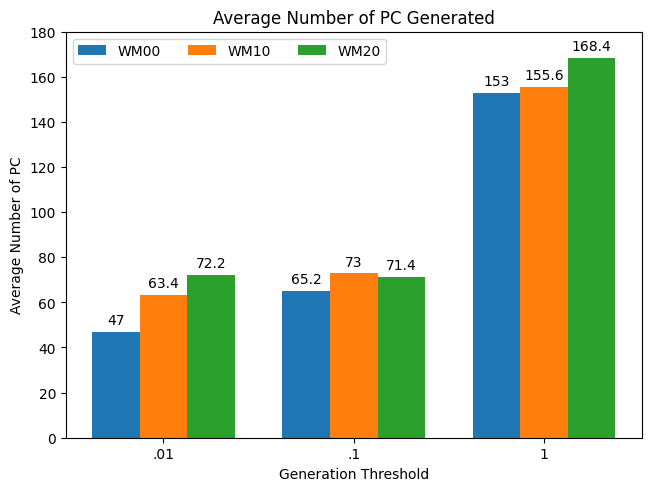

In [41]:
save_name = 'Simulation/GeneratedPCNetworks/PlaceCellFigures/AvgPC.png'

thresholds = ('.01','.1','1')
maze_means = {
    mazes[0] : maze_data_total[0],
    mazes[1] : maze_data_total[1],
    mazes[2] : maze_data_total[2]
    
}
x = np.arange(len(thresholds))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in maze_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Number of PC')
ax.set_xlabel('Generation Threshold')
ax.set_title('Average Number of PC Generated')
ax.set_xticks(x + width, thresholds)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 180)

fig.savefig(save_name)

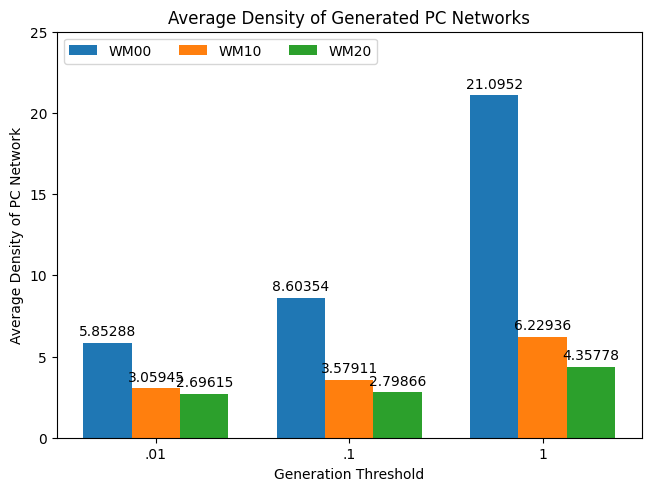

In [44]:
save_name = 'Simulation/GeneratedPCNetworks/PlaceCellFigures/AvgPCDensity.png'

thresholds = ('.01','.1','1')
maze_means = {
    mazes[0] : maze_data_den[0],
    mazes[1] : maze_data_den[1],
    mazes[2] : maze_data_den[2]
    
}
x = np.arange(len(thresholds))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in maze_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Density of PC Network')
ax.set_xlabel('Generation Threshold')
ax.set_title('Average Density of Generated PC Networks')
ax.set_xticks(x + width, thresholds)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 25)

fig.savefig(save_name)